# Reading the data into python
The data has one file "House_Rent_Dataset.csv". This file contains 3818 house rent data.

##  Data description
**The business meaning of each column in the data is as below.**

* <b>BHK</b>: Number of Bedrooms, Hall, Kitchen.
* <b>Rent</b>: Rent of the Houses/Apartments/Flats.
* <b>Size</b>: Size of the Houses/Apartments/Flats in Square Feet.
* <b>Floor</b>: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
* <b>Area Type</b>: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
* <b>Area Locality</b>: Locality of the Houses/Apartments/Flats.
* <b>City</b>: City where the Houses/Apartments/Flats are Located.
* <b>Furnishing Status</b>: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
* <b>Tenant Preferred</b>: Type of Tenant Preferred by the Owner or Agent.
* <b>Bathroom</b>: Number of Bathrooms.
* <b>Point of Contact</b>: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing library
import numpy as np 
import pandas as pd

In [3]:
#Reading the data
house=pd.read_csv("C:/Users/Niraj Kumar/Desktop/ivy/python/Project-self/house-Rent-price-prediction/House_Rent_Dataset2.csv",encoding='latin')


In [4]:
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
house.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
house.tail(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4007,18-05-2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4008,15-05-2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4009,10-07-2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4010,06-07-2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4011,04-05-2022,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [6]:
# Removing duplicate rows if any
house.drop_duplicates()
print('Shape After deleting duplicate values:', house.shape)

Shape After deleting duplicate values: (4012, 12)


In [7]:
house.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

# Defining the problem statement:

<b>Create a ML model which can predict the House Rent.</b>
-  Target Variable: Rent
-  Predictors: BHK, Size, Floor,City, Furnishing Status etc.

# Determining the type of Machine Learning
Based on the problem statement we need to create a <b>supervised ML Regression model</b>, as the target variable is Continuous.

In [8]:
house.nunique()

Posted On              80
BHK                     6
Rent                  154
Size                  487
Floor                 298
Area Type               3
Area Locality        1905
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                6
Point of Contact        3
dtype: int64

# Basic Data Exploration

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [9]:
# Looking at sample rows in the data
house.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4012 non-null   object
 1   BHK                4012 non-null   int64 
 2   Rent               4012 non-null   int64 
 3   Size               4012 non-null   int64 
 4   Floor              4012 non-null   object
 5   Area Type          4012 non-null   object
 6   Area Locality      4012 non-null   object
 7   City               4012 non-null   object
 8   Furnishing Status  4012 non-null   object
 9   Tenant Preferred   4012 non-null   object
 10  Bathroom           4012 non-null   int64 
 11  Point of Contact   4012 non-null   object
dtypes: int64(4), object(8)
memory usage: 376.2+ KB


In [11]:
# Looking at the descriptive statistics of the data
house.describe(include='all')

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4012,4012.000000,4012.000000,4012.000000,4012,4012,4012,4012,4012,4012,4012.000000,4012
unique,80,NaN,NaN,NaN,298,3,1905,6,3,3,NaN,3
top,06-07-2022,NaN,NaN,NaN,1 out of 2,Super Area,Electronic City,Chennai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,226,NaN,NaN,NaN,372,2342,24,839,1884,2989,NaN,3133
mean,NaN,1.929212,17285.648804,849.356181,NaN,NaN,NaN,NaN,NaN,NaN,1.767198,NaN
std,NaN,0.722522,10832.211364,451.452531,NaN,NaN,NaN,NaN,NaN,NaN,0.675563,NaN
min,NaN,1.000000,1200.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,1.000000,9000.000000,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,14000.000000,800.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,2.000000,22000.000000,1100.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


In [12]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
house.nunique()

Posted On              80
BHK                     6
Rent                  154
Size                  487
Floor                 298
Area Type               3
Area Locality        1905
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                6
Point of Contact        3
dtype: int64

# Basic Data Exploration Results

The selected columns in this step are not final, further study will be done and then a final list will be created
* <b>Rent</b>: Continuous. Selected. This is the <b>Target Variable!</b>
* <b>Size</b>: Continuous. Selected.
* <b>BHK</b>: Categorical. Selected.
* <b>Area Type</b>: Categorical. Selected.
* <b>City</b>: Categorical. Selected.
* <b>Furnishing Status</b>: Categorical. Selected.
* <b>Bathroom</b>: Categorical. Selected.
* <b>Tenant Preferred</b>: Categorical. Selected.
* <b>Point of Contact</b>: Categorical. Selected.


In [13]:
# Droping unwanted columns from dataset
house.drop(columns=['Posted On','Floor','Area Locality'],axis=1, inplace=True)

In [14]:
house.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

In [15]:
house.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

# Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted seven categorical predictors in the data

<b>Categorical Predictors: </b>

'BHK', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact'
    
We use bar charts to see how the data is distributed for these categorical columns.

In [16]:
# Plotting multiple bar charts at once for categorical variables
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

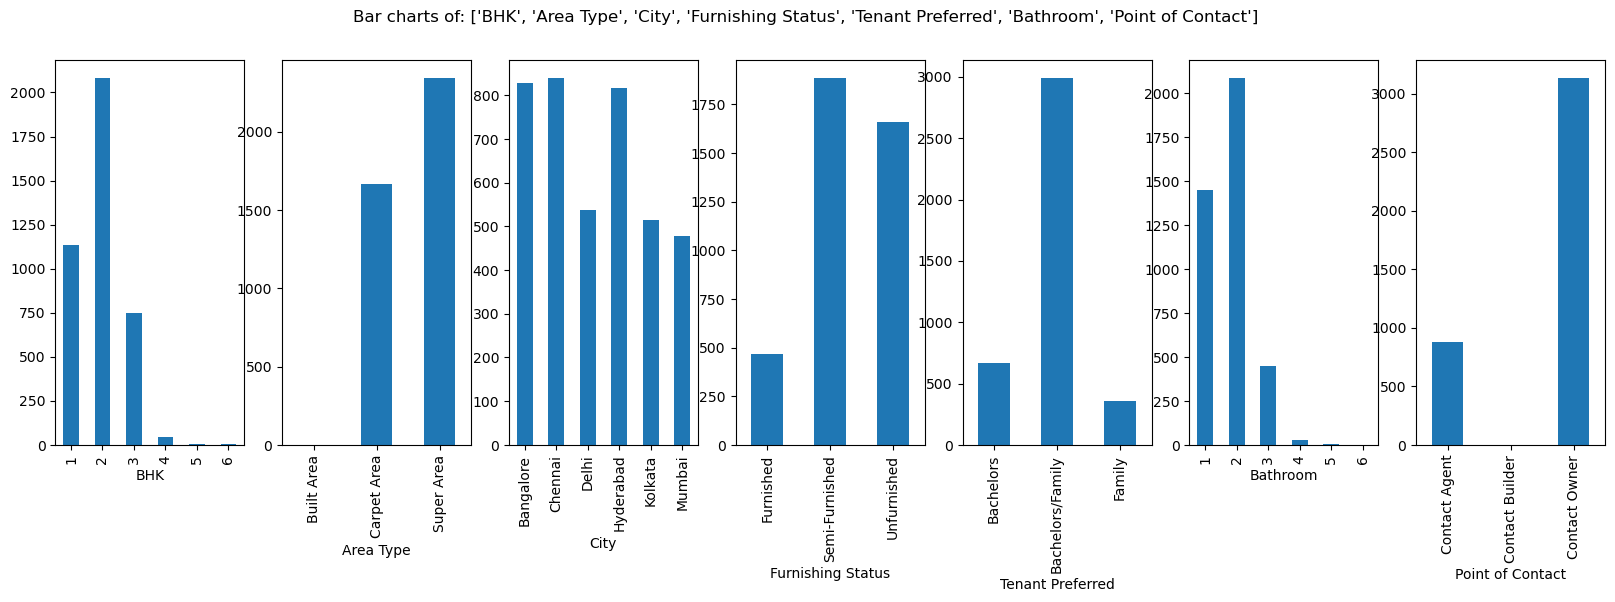

In [17]:
# Calling the function
PlotBarCharts(inpData=house, colsToPlot=['BHK', 'Area Type', 'City', 'Furnishing Status', 
                                                 'Tenant Preferred', 'Bathroom', 'Point of Contact'])

# Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'BHK', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact'

# Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Two continuous predictor variables ''Rent' And 'Size'.

array([[<AxesSubplot:title={'center':'Rent'}>,
        <AxesSubplot:title={'center':'Size'}>]], dtype=object)

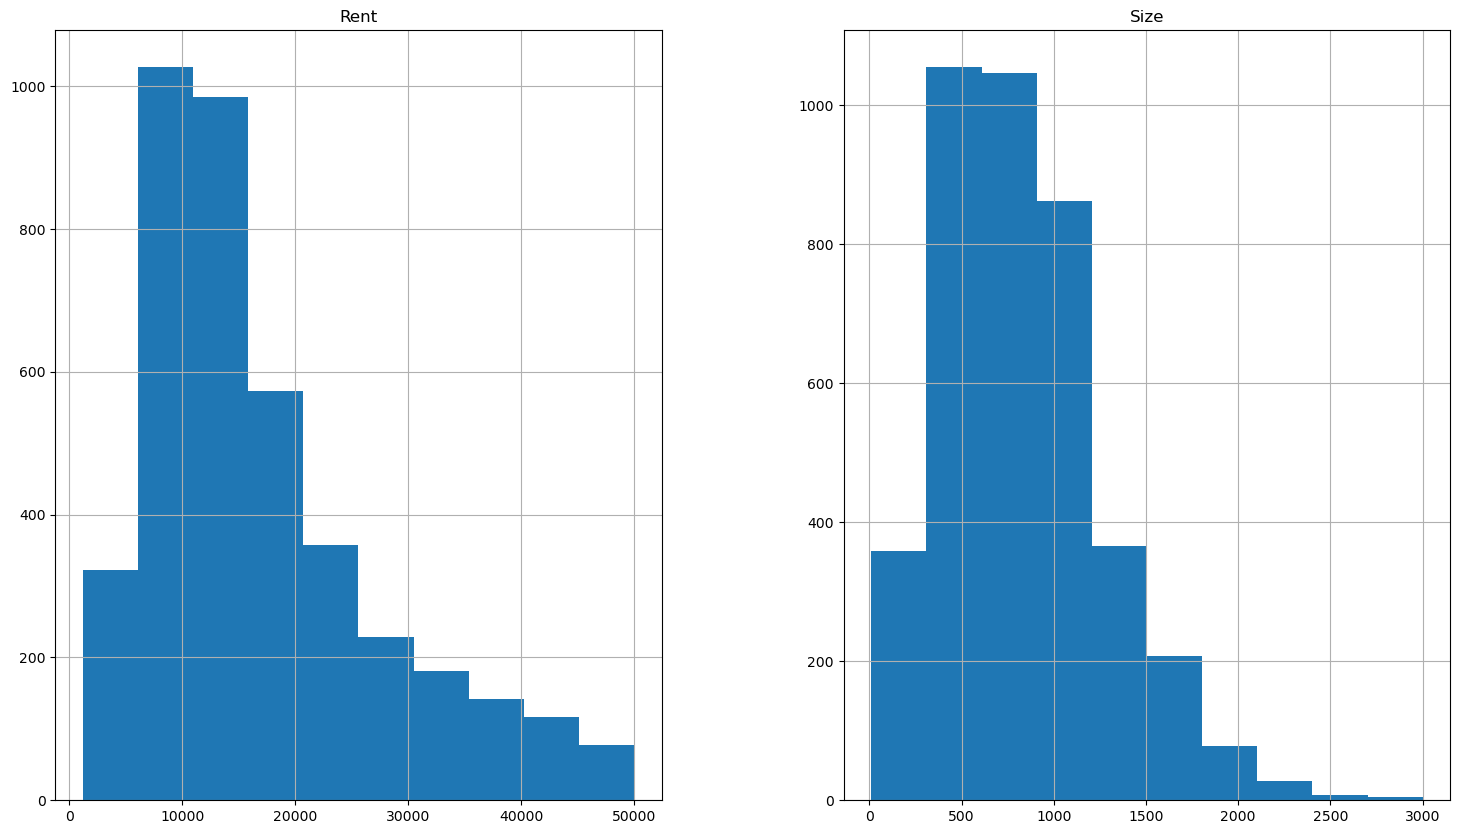

In [18]:
# Plotting histograms of multiple columns together
house.hist(['Rent','Size'], figsize=(18,10))

# Histogram Interpretation

* <b>Rent</b>: Selected.
* <b>Size</b>: Selected. The distribution is good. 

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. we can see them as the tails in the histogram.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

# Treating outliers for 'Size' column

In [19]:
# No outliers present in size colum


array([[<AxesSubplot:title={'center':'Size'}>]], dtype=object)

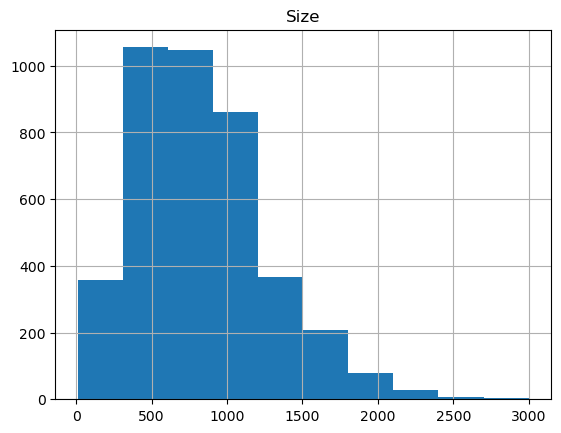

In [20]:
house.hist('Size')

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Interpolate the values based on business logic
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Delete the missing value rows if there are only few records

In [21]:
house.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [22]:
house.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

# Missing values Result
There are no any misisng values in this data

# Feature Selection (Bi-Variate analysis)
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

# Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

<AxesSubplot:title={'center':'Size VS Rent'}, xlabel='[Size]', ylabel='[Rent]'>

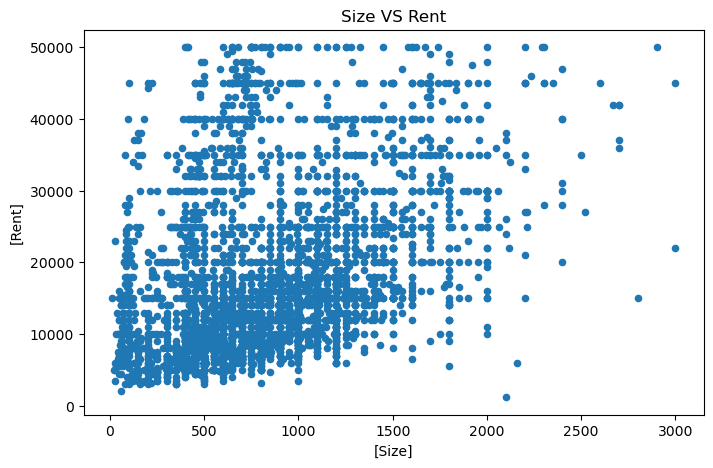

In [23]:
#self- finding the correlation between Size and Rent
house.plot.scatter(x=['Size'],y=['Rent'], figsize=(8,5), title="Size VS Rent")

# Scatter charts interpretation
<b>What should we look for in these scatter charts? </b>

Trend.
we should try to see if there is a visible trend or not. There could be three scenarios
1. Increasing Trend:
This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2. Decreasing Trend:
This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3. No Trend:
You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the 'Size' cannot be used for ML.

Based on this chart we can get a good idea about the predictor, if it will be useful or not.
we confirm this by looking at the correlation value.

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator): 

# * This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [24]:
# Calculating correlation matrix
ContinuousCols=['Rent','Size',]

# Creating the correlation matrix
CorrelationData=house[ContinuousCols].corr()
CorrelationData

,Rent,Size
Rent,1.000000,0.395857
Size,0.395857,1.000000


* <b>Size column is not selected because the collelation value is less than 0.5:</b>

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

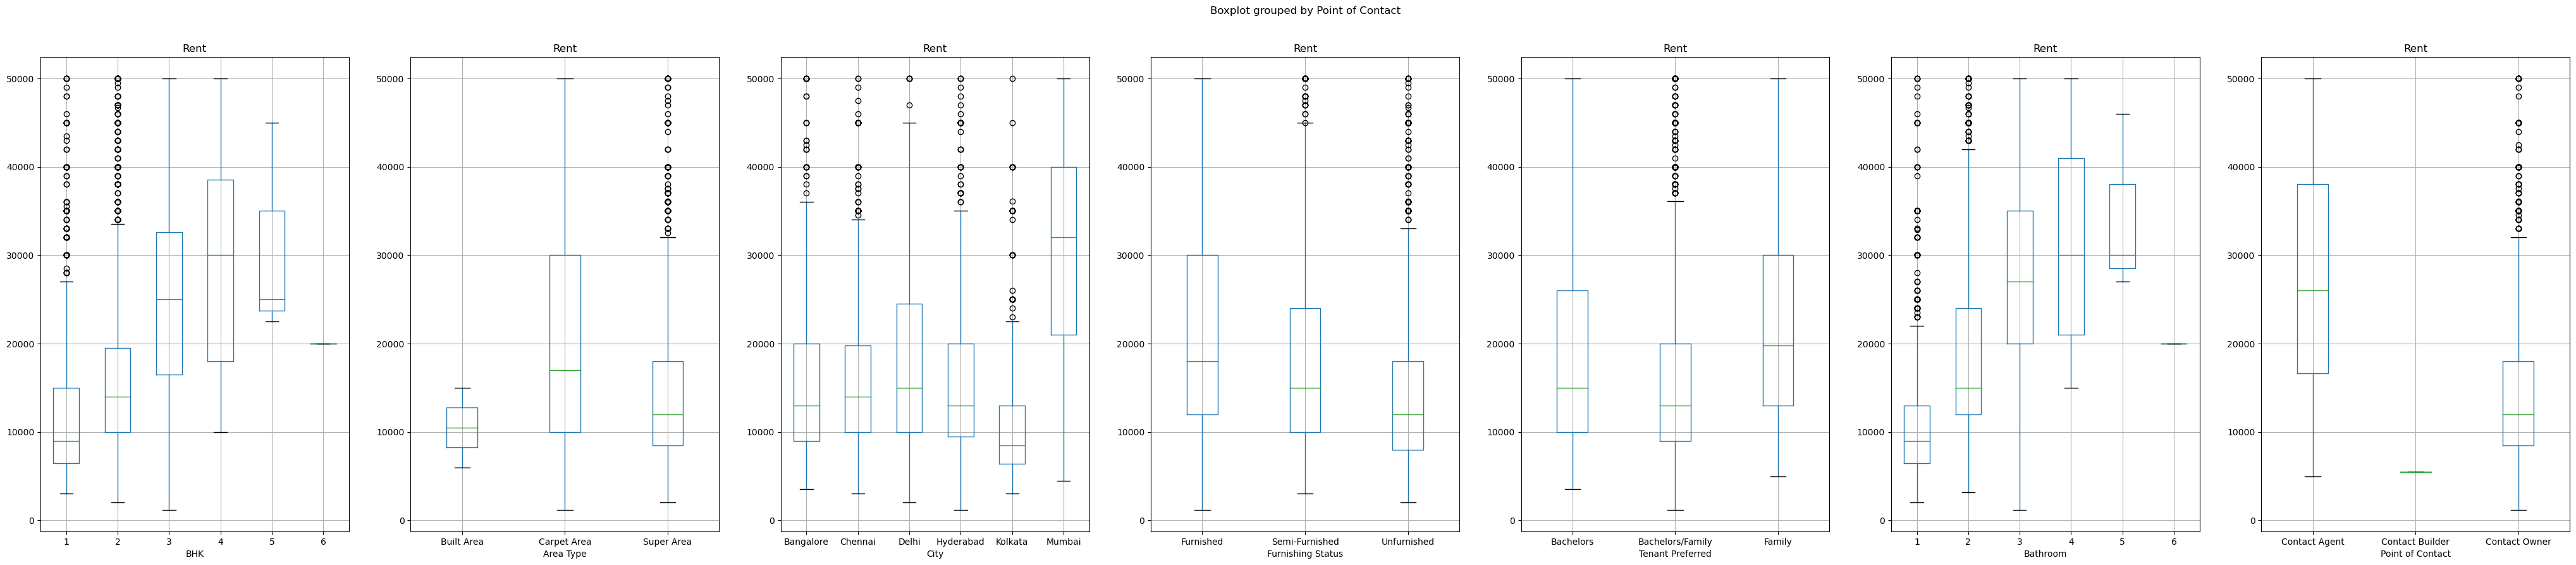

In [25]:
# Box plots for Categorical Target Variable "Rent" and continuous predictors
CategoricalColsList=['BHK', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(50,10))

# Creating box plots for each continuous predictor against the Target Variable "Rent"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    house.boxplot(column='Rent', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation
<b>What should we look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Rent.

In this data, all the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [26]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [27]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['BHK', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact']
FunctionAnova(inpData=house, 
              TargetVariable='Rent', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

BHK is correlated with Rent | P-Value: 7.896279068683866e-162
Area Type is correlated with Rent | P-Value: 2.6374427199054575e-61
City is correlated with Rent | P-Value: 2.510593629094018e-240
Furnishing Status is correlated with Rent | P-Value: 3.047248404360106e-39
Tenant Preferred is correlated with Rent | P-Value: 1.267250078680419e-27
Bathroom is correlated with Rent | P-Value: 2.150628685088118e-250
Point of Contact is correlated with Rent | P-Value: 3.185684713645144e-243


['BHK',
 'Area Type',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Bathroom',
 'Point of Contact']

# The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

<b>Final selected Categorical columns:</b>

'BHK', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [28]:
SelectedColumns=['BHK', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact']

# Selecting final columns
DataForML=house[SelectedColumns]
DataForML.head()

,BHK,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [29]:
import os
os.getcwd()

'C:\\Users\\Niraj Kumar\\Desktop\\ivy\\python\\Project-self'

In [30]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [31]:
# Reading a pickle file
import pandas as pd
DataForML=pd.read_pickle('DataForML.pkl')
DataForML.head()

,BHK,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

# Converting the nominal variable to numeric using get_dummies()

In [32]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Rent']=house['Rent']

# Printing sample rows
DataForML_Numeric.head(10)

,BHK,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Rent
0,2,2,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,10000
1,2,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,20000
2,2,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,17000
3,2,1,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,10000
4,2,1,0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,7500
5,2,2,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,7000
6,2,2,0,0,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,10000
7,1,1,0,0,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,5000
8,2,2,0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,26000
9,2,2,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,10000


In [33]:
# Printing sample rows
DataForML_Numeric.head(10)

,BHK,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Rent
0,2,2,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,10000
1,2,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,20000
2,2,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,17000
3,2,1,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,10000
4,2,1,0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,7500
5,2,2,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,7000
6,2,2,0,0,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,10000
7,1,1,0,0,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,5000
8,2,2,0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,26000
9,2,2,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,10000


In [34]:
DataForML_Numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BHK                                4012 non-null   int64
 1   Bathroom                           4012 non-null   int64
 2   Area Type_Built Area               4012 non-null   uint8
 3   Area Type_Carpet Area              4012 non-null   uint8
 4   Area Type_Super Area               4012 non-null   uint8
 5   City_Bangalore                     4012 non-null   uint8
 6   City_Chennai                       4012 non-null   uint8
 7   City_Delhi                         4012 non-null   uint8
 8   City_Hyderabad                     4012 non-null   uint8
 9   City_Kolkata                       4012 non-null   uint8
 10  City_Mumbai                        4012 non-null   uint8
 11  Furnishing Status_Furnished        4012 non-null   uint8
 12  Furnishing Status_Se

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. 
Some data is randomly selected and kept aside for checking how good the model is. 
This is known as Testing Data and the remaining data is called Training data on which the model is built. 
Typically 70%  or 80% of data is used as Training data and the rest 30% or 20% is used as Tesing data.

In [35]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['BHK', 'Bathroom', 'Area Type_Built Area', 'Area Type_Carpet Area',
       'Area Type_Super Area', 'City_Bangalore', 'City_Chennai', 'City_Delhi',
       'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'Furnishing Status_Furnished', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors',
       'Tenant Preferred_Bachelors/Family', 'Tenant Preferred_Family',
       'Point of Contact_Contact Agent', 'Point of Contact_Contact Builder',
       'Point of Contact_Contact Owner', 'Rent'],
      dtype='object')

In [36]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rent'
Predictors=['BHK', 'Bathroom', 'Area Type_Built Area', 'Area Type_Carpet Area',
       'Area Type_Super Area', 'City_Bangalore', 'City_Chennai', 'City_Delhi',
       'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'Furnishing Status_Furnished', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors',
       'Tenant Preferred_Bachelors/Family', 'Tenant Preferred_Family',
       'Point of Contact_Contact Agent', 'Point of Contact_Contact Builder',
       'Point of Contact_Contact Owner']

In [37]:
x=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [38]:
x

array([[2, 2, 0, ..., 0, 0, 1],
       [2, 1, 0, ..., 0, 0, 1],
       [2, 1, 0, ..., 0, 0, 1],
       ...,
       [3, 3, 0, ..., 1, 0, 0],
       [3, 2, 0, ..., 1, 0, 0],
       [2, 2, 0, ..., 0, 0, 1]], dtype=int64)

In [39]:
y

array([10000, 20000, 17000, ..., 35000, 45000, 15000], dtype=int64)

In [40]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [41]:
# Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3209, 20)
(3209,)
(803, 20)
(803,)


# Multiple Linear Regression

In [42]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

In [43]:
# Printing all the parameters of Linear regression
print(RegModel)

LinearRegression()


In [44]:
# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

In [45]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

R2 Value: 0.6180764557575231


In [46]:
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults.head())


##### Model Validation and Accuracy Calculations ##########
   BHK  Bathroom  Area Type_Built Area  Area Type_Carpet Area  \
0    1         1                     0                      0   
1    3         2                     0                      1   
2    3         3                     0                      1   
3    2         2                     0                      0   
4    1         1                     0                      1   

   Area Type_Super Area  City_Bangalore  City_Chennai  City_Delhi  \
0                     1               0             0           0   
1                     0               0             0           0   
2                     0               0             0           1   
3                     1               0             0           0   
4                     0               0             0           1   

   City_Hyderabad  City_Kolkata  ...  Furnishing Status_Semi-Furnished  \
0               1             0  ...                       

In [47]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rent']-TestingDataResults['PredictedRent']))/TestingDataResults['Rent'])

In [48]:
# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())

    Rent  PredictedRent         APE
0   3000         6584.0  119.466667
1  14000        16680.0   19.142857
2  50000        31688.0   36.624000
3  16000        18496.0   15.600000
4   6000         6792.0   13.200000


In [49]:
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

In [50]:
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 64.45982443731434
Median Accuracy on test data: 74.59555555555555


In [51]:
TestingDataResults['RentAVG']=TestingDataResults['Rent'].mean()
TestingDataResults.head()

,BHK,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,...,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Rent,PredictedRent,APE,RentAVG
0,1,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,3000,6584.0,119.466667,16699.002491
1,3,2,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,14000,16680.0,19.142857,16699.002491
2,3,3,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,50000,31688.0,36.624000,16699.002491
3,2,2,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,16000,18496.0,15.600000,16699.002491
4,1,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,6000,6792.0,13.200000,16699.002491


# Decision Trees

In [52]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=9, criterion='squared_error')
# Good Range of hyper parameter Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))



###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
prediction=DT.predict(X_test)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rent']-TestingDataResults['PredictedRent']))/TestingDataResults['Rent'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if we are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

DecisionTreeRegressor(max_depth=9)
R2 Value: 0.7271952880631326

##### Model Validation and Accuracy Calculations ##########
    Rent  PredictedRent
0   3000         8770.0
1  14000        16182.0
2  50000        33067.0
3  16000        22000.0
4   6000         8545.0
Mean Accuracy on test data: 65.15666037621547
Median Accuracy on test data: 75.13636363636364

Accuracy values for 10-fold Cross Validation:
 [58.88099287 59.62136038 69.28826287 71.60759692 66.65153638 58.21023951
 71.68405616 72.49812822 69.31749655 69.12144499]

Final Average Accuracy of the model: 66.69


# Random Forest Regressor

In [53]:
# Importing the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Creating the Random Forest model
RFModel = RandomForestRegressor(n_estimators=100, max_depth=9, criterion='squared_error', random_state=42)
# Good Range of hyper parameter Max_depth = 2 to 20
# Number of trees (n_estimators) can typically be 100, but can be adjusted

# Printing all the parameters of Random Forest
print(RFModel)

# Creating the model on Training Data
RF = RFModel.fit(X_train, y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, RF.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
prediction = RF.predict(X_test)
# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted'+TargetVariable)] = np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable, 'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(
    TestingDataResults[TargetVariable] - TestingDataResults['Predicted'+TargetVariable])) / TestingDataResults[TargetVariable])

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)  # Can be negative sometimes due to outliers
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if we are using MAPE
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    # print('#'*70,'Accuracy:', 100-MAPE)
    return (100 - MAPE)

# Custom Scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross-validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RFModel, x, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


RandomForestRegressor(max_depth=9, random_state=42)
R2 Value: 0.7329273355079893

##### Model Validation and Accuracy Calculations ##########
    Rent  PredictedRent
0   3000         8721.0
1  14000        13146.0
2  50000        30673.0
3  16000        14705.0
4   6000         9321.0
Mean Accuracy on test data: 65.76865824038788
Median Accuracy on test data: 74.575

Accuracy values for 10-fold Cross Validation:
 [60.53010159 61.65438009 69.68194371 71.83717053 67.48977392 58.7514674
 70.37206035 72.37114811 69.00969762 69.31832208]

Final Average Accuracy of the model: 67.1


# GradientBoostingRegressor

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Creating the Gradient Boosting model
GBModel = GradientBoostingRegressor(n_estimators=100, max_depth=9, random_state=42)

# Printing all the parameters of Gradient Boosting
print(GBModel)

# Creating the model on Training Data
GB = GBModel.fit(X_train, y_train)

# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, GB.predict(X_train)))

# Model Validation and Accuracy Calculations
prediction = GB.predict(X_test)
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted' + TargetVariable)] = np.round(prediction)

print(TestingDataResults[[TargetVariable, 'Predicted' + TargetVariable]].head())

TestingDataResults['APE'] = 100 * ((abs(
    TestingDataResults[TargetVariable] - TestingDataResults['Predicted' + TargetVariable])) / TestingDataResults[TargetVariable])

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

Accuracy_Values = cross_val_score(GBModel, x, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


GradientBoostingRegressor(max_depth=9, random_state=42)
R2 Value: 0.7636115824024042
    Rent  PredictedRent
0   3000         8206.0
1  14000        11386.0
2  50000        27042.0
3  16000        21104.0
4   6000         9896.0
Mean Accuracy on test data: 65.29785702644693
Median Accuracy on test data: 74.35

Accuracy values for 10-fold Cross Validation:
 [62.6663274  60.13699874 68.60458892 68.96518565 66.08148806 55.94730279
 69.98833201 71.35100303 68.05767383 68.93699887]

Final Average Accuracy of the model: 66.07


# Support Vector Regressor

In [55]:
from sklearn.svm import SVR

# Creating the Support Vector Regressor model
SVRModel = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Printing all the parameters of Support Vector Regressor
print(SVRModel)

# Creating the model on Training Data
SVR = SVRModel.fit(X_train, y_train)

# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, SVR.predict(X_train)))

# Model Validation and Accuracy Calculations
prediction = SVR.predict(X_test)
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted' + TargetVariable)] = np.round(prediction)

print(TestingDataResults[[TargetVariable, 'Predicted' + TargetVariable]].head())

TestingDataResults['APE'] = 100 * ((abs(
    TestingDataResults[TargetVariable] - TestingDataResults['Predicted' + TargetVariable])) / TestingDataResults[TargetVariable])

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

Accuracy_Values = cross_val_score(SVRModel, x, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


SVR(C=100, gamma=0.1)
R2 Value: 0.4296152242626994
    Rent  PredictedRent
0   3000         8900.0
1  14000        16114.0
2  50000        24973.0
3  16000        16132.0
4   6000         9512.0
Mean Accuracy on test data: 65.38168530331869
Median Accuracy on test data: 72.025

Accuracy values for 10-fold Cross Validation:
 [38.52349949 55.81267031 66.63516101 70.52693061 66.45708519 64.39111697
 69.35096503 70.83920778 67.15365246 67.80679977]

Final Average Accuracy of the model: 63.75
